<a href="https://colab.research.google.com/github/Monika-mahawar/product-search-engine/blob/main/aqi_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing all the required libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
plt.style.use('ggplot')
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression

**Importing the Data of air quality data - Stations.csv**


In [ ]:
df = pd.read_csv('/content/stations[1].csv')
df

,StationId,StationName,City,State,Status
0,AP001,"Secretariat, Amaravati - APPCB",Amaravati,Andhra Pradesh,Active
1,AP002,"Anand Kala Kshetram, Rajamahendravaram - APPCB",Rajamahendravaram,Andhra Pradesh,NaN
2,AP003,"Tirumala, Tirupati - APPCB",Tirupati,Andhra Pradesh,NaN
3,AP004,"PWD Grounds, Vijayawada - APPCB",Vijayawada,Andhra Pradesh,NaN
4,AP005,"GVM Corporation, Visakhapatnam - APPCB",Visakhapatnam,Andhra Pradesh,Active
...,...,...,...,...,...
225,WB010,"Jadavpur, Kolkata - WBPCB",Kolkata,West Bengal,Active
226,WB011,"Rabindra Bharati University, Kolkata - WBPCB",Kolkata,West Bengal,Active
227,WB012,"Rabindra Sarobar, Kolkata - WBPCB",Kolkata,West Bengal,Active
228,WB013,"Victoria, Kolkata - WBPCB",Kolkata,West Bengal,Active


# Understanding and Analyzing the Data

In [ ]:
df.shape   # checking the shape of the data table

(230, 5)

In [ ]:
df['State'].value_counts()   # counting the numbers in State column

,count
State,
Delhi,38
Haryana,29
Uttar Pradesh,26
Maharashtra,22
Karnataka,20
Madhya Pradesh,16
West Bengal,14
Rajasthan,10
Bihar,10


In [ ]:
state_stations = df.groupby('State')['StationId'].unique().reset_index()
state_stations       # groupby, checking unique data with reset index

,State,StationId
0,Andhra Pradesh,"[AP001, AP002, AP003, AP004, AP005]"
1,Assam,[AS001]
2,Bihar,"[BR001, BR002, BR003, BR004, BR005, BR006, BR0..."
3,Chandigarh,[CH001]
4,Delhi,"[DL001, DL002, DL003, DL004, DL005, DL006, DL0..."
5,Gujarat,"[GJ001, GJ002, GJ003, GJ004, GJ005, GJ006]"
6,Haryana,"[HR001, HR002, HR003, HR004, HR005, HR006, HR0..."
7,Jharkhand,[JH001]
8,Karnataka,"[KA001, KA002, KA003, KA004, KA005, KA006, KA0..."
9,Kerala,"[KL001, KL002, KL003, KL004, KL005, KL006, KL0..."


In [ ]:
TG_stations = state_stations[-3:-2]['StationId']
print(TG_stations)

18    [TG001, TG002, TG003, TG004, TG005, TG006]
Name: StationId, dtype: object


**Importing the Data of air quality data - Stations_hour**

In [ ]:
df1 = pd.read_csv('/content/station_hour[1].csv',low_memory=False)
df1

,StationId,Datetime,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,AP001,2017-11-24 17:00:00,60.50,98.00,2.35,30.80,18.25,8.50,0.10,11.85,126.40,0.10,6.10,0.10,NaN,NaN
1,AP001,2017-11-24 18:00:00,65.50,111.25,2.70,24.20,15.07,9.77,0.10,13.17,117.12,0.10,6.25,0.15,NaN,NaN
2,AP001,2017-11-24 19:00:00,80.00,132.00,2.10,25.18,15.15,12.02,0.10,12.08,98.98,0.20,5.98,0.18,NaN,NaN
3,AP001,2017-11-24 20:00:00,81.50,133.25,1.95,16.25,10.23,11.58,0.10,10.47,112.20,0.20,6.72,0.10,NaN,NaN
4,AP001,2017-11-24 21:00:00,75.25,116.00,1.43,17.48,10.43,12.03,0.10,9.12,106.35,0.20,5.75,0.08,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2589078,WB013,2020-06-30 20:00:00,15.55,47.80,7.27,35.08,42.38,31.25,0.80,9.40,17.24,2.56,11.57,NaN,59.0,Satisfactory
2589079,WB013,2020-06-30 21:00:00,15.23,42.30,6.10,26.78,32.85,30.66,0.56,4.91,17.46,3.49,12.29,NaN,59.0,Satisfactory
2589080,WB013,2020-06-30 22:00:00,11.40,40.95,6.58,19.53,26.12,30.73,0.61,3.81,17.24,1.83,8.88,NaN,59.0,Satisfactory
2589081,WB013,2020-06-30 23:00:00,9.25,34.33,9.17,21.85,31.00,29.61,0.65,3.44,12.74,1.40,8.43,NaN,59.0,Satisfactory


In [ ]:
df1.describe()  # checking the stats

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
count,1.941394e+06,1.469831e+06,2.035372e+06,2.060110e+06,2.098275e+06,1.352465e+06,2.089781e+06,1.846346e+06,1.863110e+06,1.727504e+06,1.546717e+06,513979.000000,2.018893e+06
mean,8.086481e+01,1.584839e+02,2.278825e+01,3.523689e+01,4.055115e+01,2.870856e+01,1.502366e+00,1.211602e+01,3.806408e+01,3.305493e+00,1.490266e+01,2.448881,1.801730e+02
std,8.947618e+01,1.397883e+02,4.846146e+01,3.497508e+01,5.590894e+01,2.753244e+01,6.292445e+00,1.467385e+01,4.710653e+01,1.214053e+01,3.329729e+01,8.973470,1.404095e+02
min,1.000000e-02,1.000000e-02,1.000000e-02,1.000000e-02,0.000000e+00,1.000000e-02,0.000000e+00,1.000000e-02,1.000000e-02,0.000000e+00,0.000000e+00,0.000000,5.000000e+00
25%,2.816000e+01,6.400000e+01,3.050000e+00,1.310000e+01,1.135000e+01,1.123000e+01,4.100000e-01,4.250000e+00,1.102000e+01,8.000000e-02,3.400000e-01,0.000000,8.400000e+01
50%,5.259000e+01,1.162500e+02,7.150000e+00,2.479000e+01,2.286000e+01,2.235000e+01,8.000000e-01,8.250000e+00,2.475000e+01,9.600000e-01,3.400000e+00,0.200000,1.310000e+02
75%,9.774000e+01,2.040000e+02,1.858000e+01,4.548000e+01,4.570000e+01,3.778000e+01,1.380000e+00,1.453000e+01,4.953000e+01,3.230000e+00,1.510000e+01,1.830000,2.590000e+02
max,1.000000e+03,1.000000e+03,5.000000e+02,4.999900e+02,5.000000e+02,4.999700e+02,4.985700e+02,1.999600e+02,9.970000e+02,4.980700e+02,4.999900e+02,499.990000,3.133000e+03


In [ ]:
df1.columns   # To know the column names

Index(['StationId', 'Datetime', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3',
       'CO', 'SO2', 'O3', 'Benzene', 'Toluene', 'Xylene', 'AQI', 'AQI_Bucket'],
      dtype='object')

In [ ]:
df1.isna().sum()  # To know the null value

,0
StationId,0
Datetime,0
PM2.5,647689
PM10,1119252
NO,553711
NO2,528973
NOx,490808
NH3,1236618
CO,499302
SO2,742737


In [ ]:
df1['AQI_Bucket'].value_counts()   # To count the values in the AQI bucket

,count
AQI_Bucket,
Moderate,675008
Satisfactory,530164
Very Poor,301150
Poor,239990
Good,152113
Severe,120468


In [ ]:
df1.dtypes   # to check the datatype

,0
StationId,object
Datetime,object
PM2.5,float64
PM10,float64
NO,float64
NO2,float64
NOx,float64
NH3,float64
CO,float64
SO2,float64


In [ ]:
df1['Datetime'] = pd.to_datetime(df1['Datetime'])  #converting the data type from object to datetime64

In [ ]:
df1.dtypes  #checking data types of all columns

,0
StationId,object
Datetime,datetime64[ns]
PM2.5,float64
PM10,float64
NO,float64
NO2,float64
NOx,float64
NH3,float64
CO,float64
SO2,float64


In [ ]:
df1.loc[df1.duplicated()]

,StationId,Datetime,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket


In [ ]:
target_station = 'TG006'      # taking one of the station from the data
station_df = df1[df1['StationId'] == target_station]

In [ ]:
station_df

,StationId,Datetime,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
2161958,TG006,2015-09-02 16:00:00,22.0,93.0,3.42,25.85,15.12,NaN,0.34,5.23,62.20,0.20,0.58,0.10,NaN,NaN
2161959,TG006,2015-09-02 17:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2161960,TG006,2015-09-02 18:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2161961,TG006,2015-09-02 19:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2161962,TG006,2015-09-02 20:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2204274,TG006,2020-06-30 20:00:00,22.5,NaN,2.45,26.48,16.07,7.05,0.33,4.25,19.40,0.60,23.10,1.10,37.0,Good
2204275,TG006,2020-06-30 21:00:00,34.5,NaN,2.53,27.00,16.40,7.03,0.39,4.05,19.50,1.00,32.90,1.40,35.0,Good
2204276,TG006,2020-06-30 22:00:00,36.5,NaN,2.12,29.68,17.52,8.60,0.36,3.68,24.02,1.00,30.90,2.05,35.0,Good
2204277,TG006,2020-06-30 23:00:00,31.0,NaN,2.05,31.55,18.45,9.50,0.32,3.10,19.60,1.07,29.15,0.75,35.0,Good


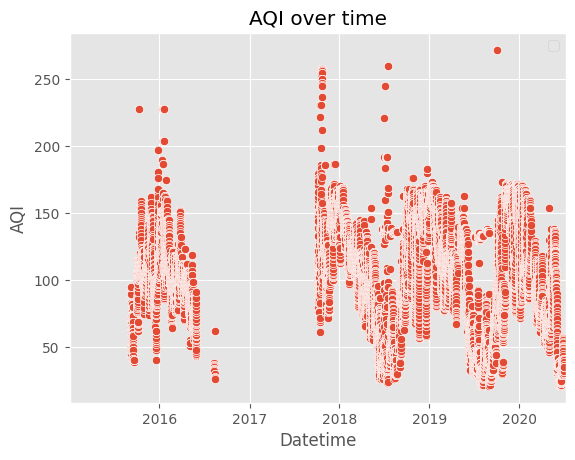

In [ ]:
ax = sns.scatterplot(x='Datetime',y='AQI',data=station_df)
ax.set_title('AQI over time')
plt.legend(loc='best')
plt.xlim(df1['Datetime'].min(), df1['Datetime'].max() + pd.Timedelta(weeks=1))  # We can adjust the timedelta as needed
plt.show()

From the above scatter plot it is observed that the high number of AQI is shown in the year between 2019-2020, followed by 2018-2019 and 2017-2018 which as crossed the number of 250.

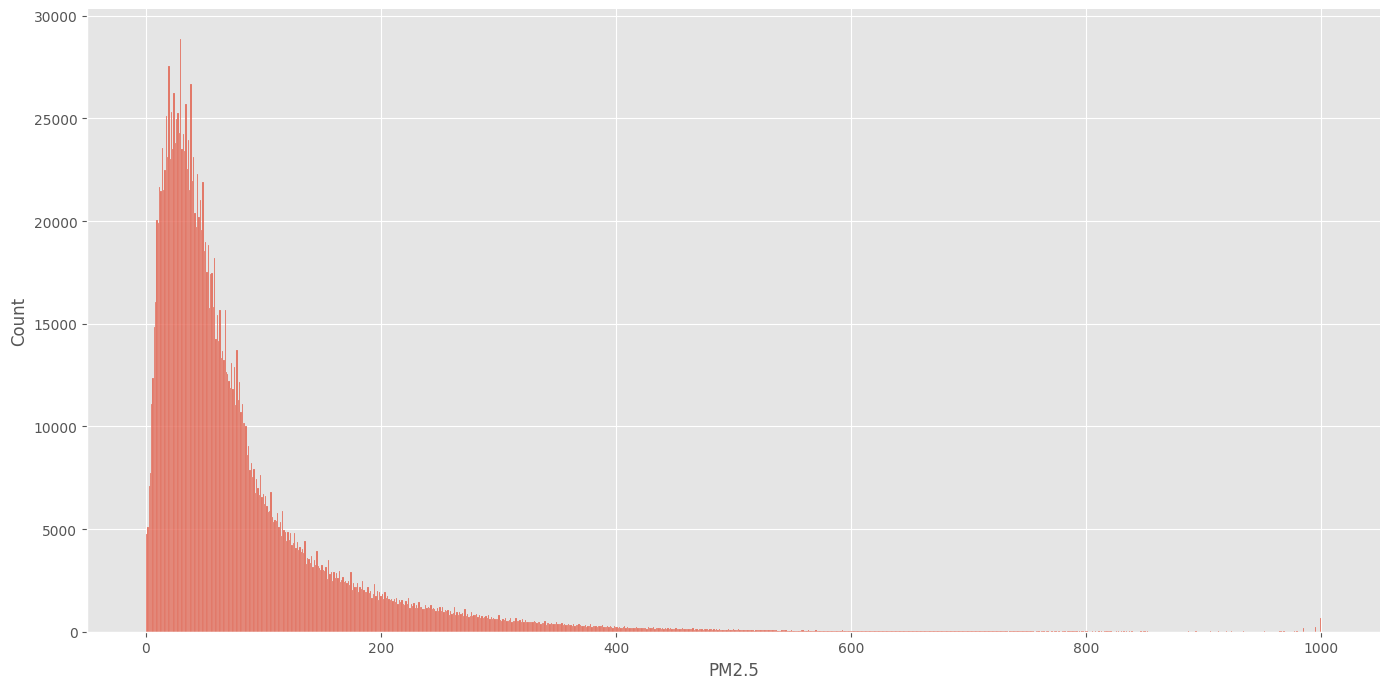

In [ ]:
sns.displot(df1['PM2.5'],aspect=2,height=7)

From the above plotting, it is observed that PM2.5 is high in between 0 to 200

**Importing the Data of air quality data - City_day from the kaggle dataset**

In [ ]:
df2 = pd.read_csv('/content/city_day[1].csv')

In [ ]:
df2.head()   # limiting the rows to top 5 values

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN


In [ ]:
df2.dtypes   # checking data type of the columns

,0
City,object
Date,object
PM2.5,float64
PM10,float64
NO,float64
NO2,float64
NOx,float64
NH3,float64
CO,float64
SO2,float64


In [ ]:
df2.describe()  # checking the stats

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
count,24933.000000,18391.000000,25949.000000,25946.000000,25346.000000,19203.000000,27472.000000,25677.000000,25509.000000,23908.000000,21490.000000,11422.000000,24850.000000
mean,67.450578,118.127103,17.574730,28.560659,32.309123,23.483476,2.248598,14.531977,34.491430,3.280840,8.700972,3.070128,166.463581
std,64.661449,90.605110,22.785846,24.474746,31.646011,25.684275,6.962884,18.133775,21.694928,15.811136,19.969164,6.323247,140.696585
min,0.040000,0.010000,0.020000,0.010000,0.000000,0.010000,0.000000,0.010000,0.010000,0.000000,0.000000,0.000000,13.000000
25%,28.820000,56.255000,5.630000,11.750000,12.820000,8.580000,0.510000,5.670000,18.860000,0.120000,0.600000,0.140000,81.000000
50%,48.570000,95.680000,9.890000,21.690000,23.520000,15.850000,0.890000,9.160000,30.840000,1.070000,2.970000,0.980000,118.000000
75%,80.590000,149.745000,19.950000,37.620000,40.127500,30.020000,1.450000,15.220000,45.570000,3.080000,9.150000,3.350000,208.000000
max,949.990000,1000.000000,390.680000,362.210000,467.630000,352.890000,175.810000,193.860000,257.730000,455.030000,454.850000,170.370000,2049.000000


In [ ]:
df2['Date'] = pd.to_datetime(df2['Date'])  # converting object to datetime

In [ ]:
df2['City'].value_counts()  # counting the numbers with relate to city

,count
City,
Ahmedabad,2009
Delhi,2009
Mumbai,2009
Bengaluru,2009
Lucknow,2009
Chennai,2009
Hyderabad,2006
Patna,1858
Gurugram,1679


In [ ]:
most_polluted = df2[['City', 'AQI', 'PM10', 'CO']].groupby(['City']).mean().sort_values(by = 'AQI', ascending = False)
most_polluted

,AQI,PM10,CO
City,,,
Ahmedabad,452.122939,114.584029,22.193407
Delhi,259.487744,232.809229,1.976053
Patna,240.782042,126.747958,1.533591
Gurugram,225.123882,191.504432,1.257516
Lucknow,217.973059,NaN,2.130328
Talcher,172.886819,165.772708,1.847722
Jorapokhar,159.251621,149.657942,0.663049
Brajrajnagar,150.280505,124.217373,1.798274
Kolkata,140.566313,115.629499,0.799251


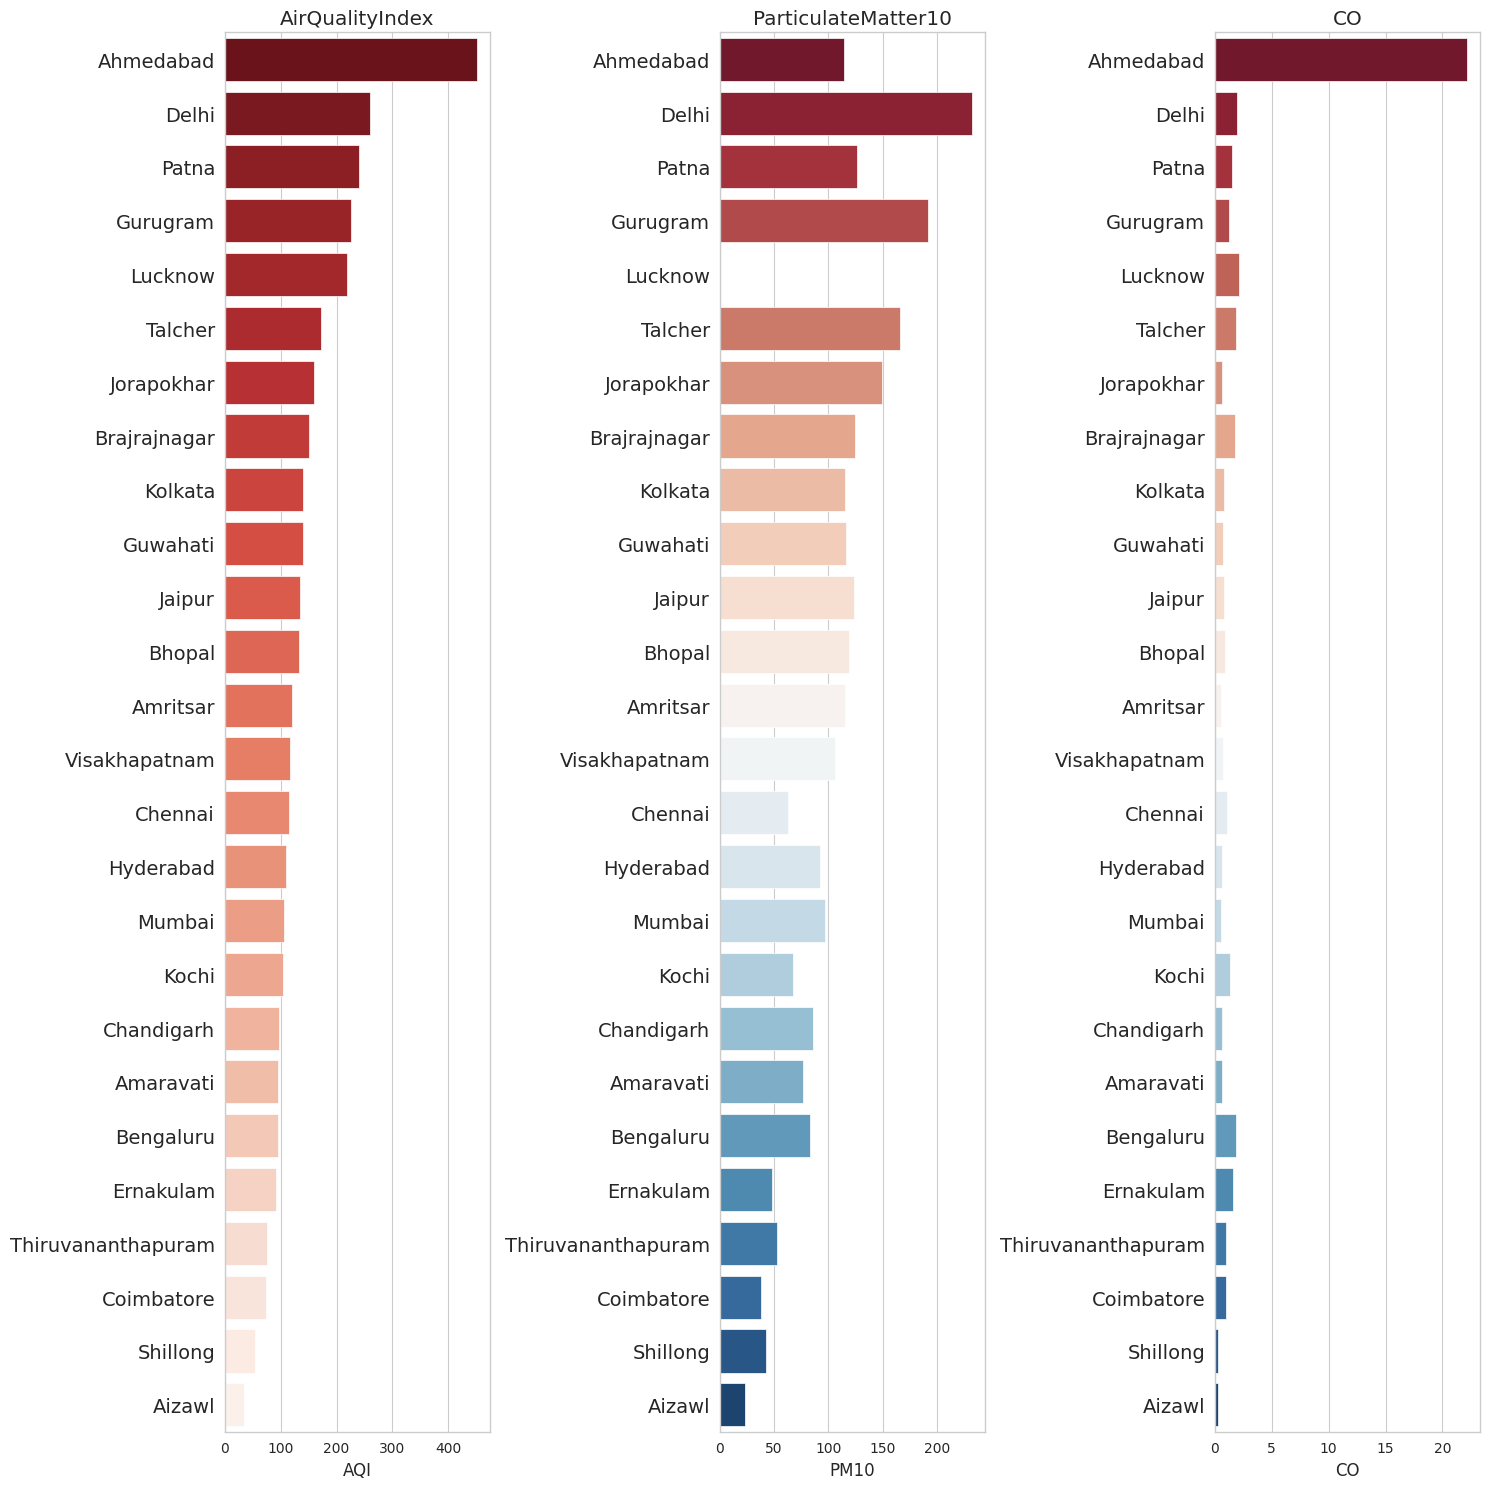

In [ ]:
sns.set_style("whitegrid")

f, ax_ = plt.subplots(1, 3, figsize = (15,15))

bar1 = sns.barplot(x = most_polluted.AQI,
                   y = most_polluted.index,
                   palette = 'Reds_r',
                   ax = ax_[0]);

bar1 = sns.barplot(x = most_polluted.PM10,
                   y = most_polluted.index,
                   palette = 'RdBu',
                   ax = ax_[1]);

bar1 = sns.barplot(x = most_polluted.CO,
                   y = most_polluted.index,
                   palette = 'RdBu',
                   ax = ax_[2]);

titles = ['AirQualityIndex', 'ParticulateMatter10', 'CO']
for i in range(3) :
    ax_[i].set_ylabel('')
    ax_[i].set_yticklabels(labels = ax_[i].get_yticklabels(),fontsize = 14);
    ax_[i].set_title(titles[i])
    f.tight_layout()

**Analysing the data for Hyderabad City on AQI over Time**

In [ ]:
target_city = 'Hyderabad'    # Taking a particular city
City_df2 = df2[df2['City'] == target_city]
City_df2

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
14581,Hyderabad,2015-01-04,NaN,NaN,3.70,17.19,20.89,NaN,0.30,2.58,30.34,0.41,6.15,1.11,NaN,NaN
14582,Hyderabad,2015-01-05,NaN,NaN,3.61,9.69,13.30,NaN,0.23,5.19,31.28,0.39,7.22,0.55,NaN,NaN
14583,Hyderabad,2015-01-06,NaN,NaN,4.21,22.02,26.23,NaN,0.31,9.09,28.56,0.52,5.14,0.53,NaN,NaN
14584,Hyderabad,2015-01-07,NaN,NaN,26.08,40.08,66.15,NaN,0.53,9.03,31.08,1.92,16.35,2.14,NaN,NaN
14585,Hyderabad,2015-01-08,NaN,NaN,10.31,33.02,43.33,NaN,0.44,8.47,35.72,1.89,14.27,1.58,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16582,Hyderabad,2020-06-27,23.29,44.20,6.38,22.64,15.39,9.34,0.36,5.39,24.22,0.88,6.72,0.95,58.0,Satisfactory
16583,Hyderabad,2020-06-28,15.80,32.18,5.79,22.73,14.89,11.09,0.36,6.36,22.25,0.82,6.48,1.11,49.0,Good
16584,Hyderabad,2020-06-29,20.24,44.74,3.96,27.59,17.09,13.09,0.38,6.29,19.98,1.31,10.83,2.71,47.0,Good
16585,Hyderabad,2020-06-30,19.38,41.95,2.63,24.58,14.59,10.80,0.39,5.30,17.40,1.45,13.07,2.51,46.0,Good


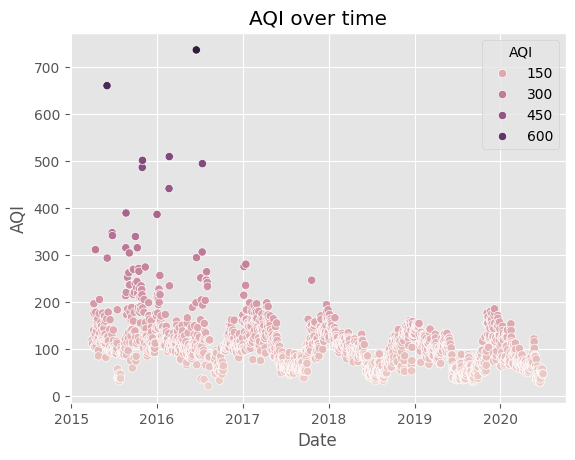

In [ ]:
# plotting the AQI over Time chart
ax = sns.scatterplot(x='Date', y='AQI',hue= 'AQI',data=City_df2)
ax.set_title('AQI over time')
plt.show()

In [ ]:
City_df2.columns

Index(['City', 'Date', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2',
       'O3', 'Benzene', 'Toluene', 'Xylene', 'AQI', 'AQI_Bucket'],
      dtype='object')

In [ ]:
df_corr = City_df2[['Date', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2',
       'O3', 'Benzene', 'Toluene', 'Xylene', 'AQI']].dropna().corr()
df_corr

,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
Date,1.000000,-0.279408,-0.104905,-0.185776,0.060170,0.163863,-0.157016,-0.169818,-0.248893,-0.383547,0.195437,0.210681,0.085155,-0.402947
PM2.5,-0.279408,1.000000,0.584640,0.227035,0.245612,0.308460,0.164890,0.456353,0.279573,0.311300,0.288066,0.259739,0.156415,0.866114
PM10,-0.104905,0.584640,1.000000,0.297973,0.584199,0.474682,0.372028,0.325644,0.441984,0.413028,0.431400,0.427958,0.326124,0.680515
NO,-0.185776,0.227035,0.297973,1.000000,0.449299,0.413266,0.309671,0.063608,0.378140,0.081262,0.117398,0.136059,0.126127,0.239406
NO2,0.060170,0.245612,0.584199,0.449299,1.000000,0.634754,0.594781,0.083224,0.490278,0.258232,0.366986,0.390531,0.346755,0.265958
NOx,0.163863,0.308460,0.474682,0.413266,0.634754,1.000000,0.270705,0.607593,0.111289,0.013291,0.669963,0.645668,0.466047,0.284195
NH3,-0.157016,0.164890,0.372028,0.309671,0.594781,0.270705,1.000000,0.003578,0.479920,0.234895,-0.044193,-0.031811,0.014971,0.232307
CO,-0.169818,0.456353,0.325644,0.063608,0.083224,0.607593,0.003578,1.000000,-0.002391,0.093323,0.498061,0.409321,0.239541,0.422720
SO2,-0.248893,0.279573,0.441984,0.378140,0.490278,0.111289,0.479920,-0.002391,1.000000,0.353194,0.079530,0.120112,0.127829,0.295046
O3,-0.383547,0.311300,0.413028,0.081262,0.258232,0.013291,0.234895,0.093323,0.353194,1.000000,0.068830,0.004781,-0.039657,0.475000


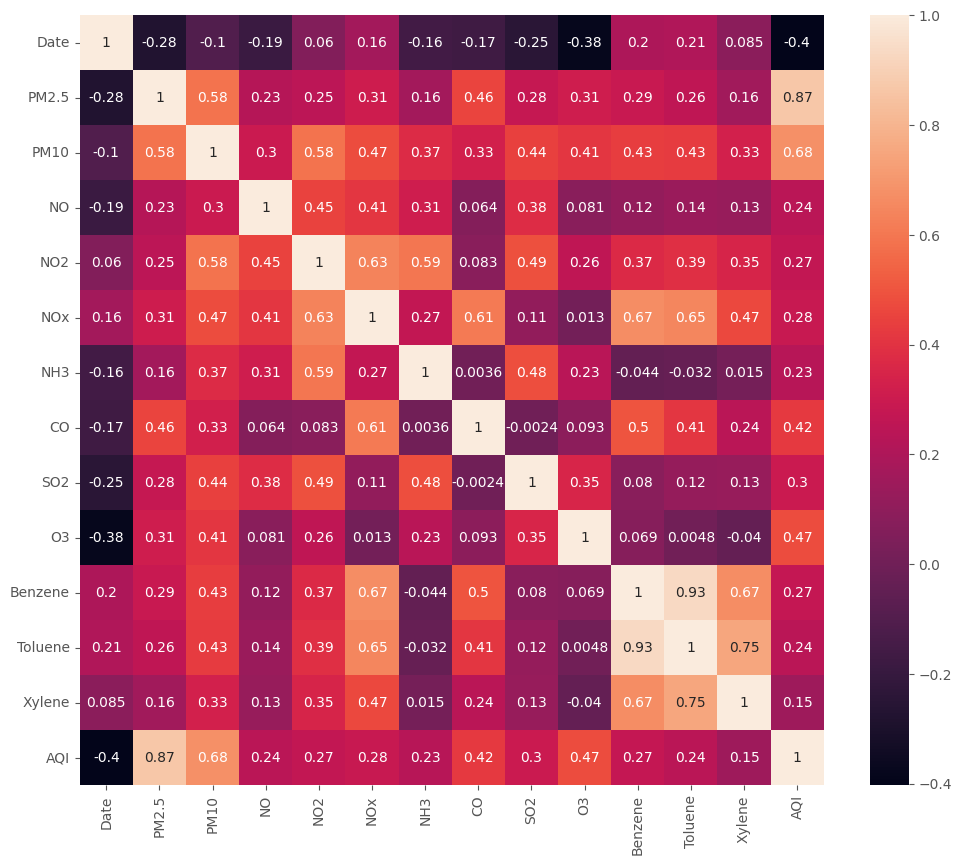

In [ ]:
# plotting the heatmap for correlation of various elements with time and range
plt.figure(figsize=(12, 10))  # Adjust width and height as needed
sns.heatmap(df_corr, annot=True)
plt.show()

City            0
Date            0
PM2.5         115
PM10          355
NO             28
NO2            28
NOx             7
NH3           360
CO              5
SO2            26
O3             26
Benzene       127
Toluene       127
Xylene        127
AQI           126
AQI_Bucket    126
dtype: int64


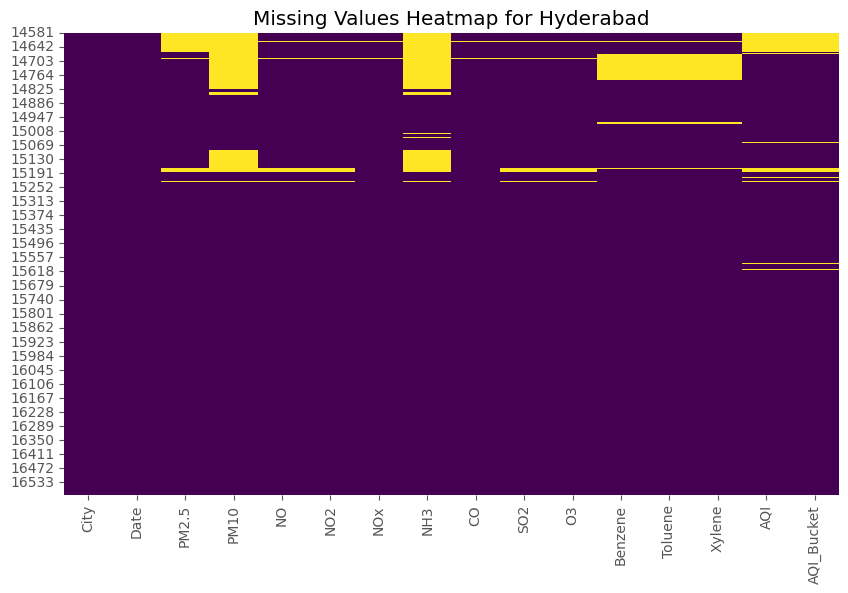

In [ ]:

# Load the city_day dataset
df2 = pd.read_csv('/content/city_day[1].csv')
df2['Date'] = pd.to_datetime(df2['Date'])

# Filter data for Hyderabad
target_city = 'Hyderabad'
City_df2 = df2[df2['City'] == target_city]

# Display missing values for Hyderabad
print(City_df2.isnull().sum())

# Visualize missing values (optional)
plt.figure(figsize=(10, 6))
sns.heatmap(City_df2.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap for Hyderabad')
plt.show()

<ipython-input-259-e2e244a3c4b3>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  City_df2[col] = City_df2[col].interpolate(method='linear')


City            0
Date            0
PM2.5          86
PM10          241
NO              0
NO2             0
NOx             0
NH3           247
CO              0
SO2             0
O3              0
Benzene         0
Toluene         0
Xylene          0
AQI            86
AQI_Bucket    126
dtype: int64


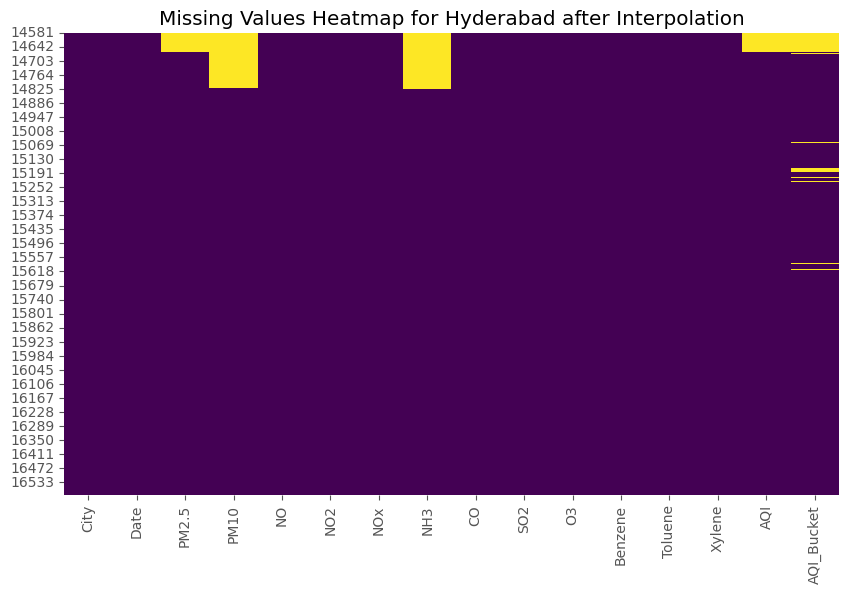

In [ ]:

# Load the city_day dataset
df2 = pd.read_csv('/content/city_day[1].csv')
df2['Date'] = pd.to_datetime(df2['Date'])

# Filter data for Hyderabad
target_city = 'Hyderabad'
City_df2 = df2[df2['City'] == target_city]

# Linear interpolation for numerical features
numerical_cols = ['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene', 'Xylene', 'AQI']
for col in numerical_cols:
    City_df2[col] = City_df2[col].interpolate(method='linear')


print(City_df2.isnull().sum())

plt.figure(figsize=(10, 6))
sns.heatmap(City_df2.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap for Hyderabad after Interpolation')
plt.show()

In [ ]:
#fill the categorical missing values wiuth mode
for col in City_df2.columns:
    if City_df2[col].isnull().any():
        if not pd.api.types.is_numeric_dtype(City_df2[col]):
            City_df2[col] = City_df2[col].fillna(City_df2[col].mode()[0])



<ipython-input-260-9d2b8f0ee326>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  City_df2[col] = City_df2[col].fillna(City_df2[col].mode()[0])


In [ ]:
print(City_df2.isnull().sum())

City            0
Date            0
PM2.5          86
PM10          241
NO              0
NO2             0
NOx             0
NH3           247
CO              0
SO2             0
O3              0
Benzene         0
Toluene         0
Xylene          0
AQI            86
AQI_Bucket      0
dtype: int64


In [ ]:

for col in ['PM2.5', 'PM10', 'NH3', 'AQI']:
    City_df2[col] = City_df2[col].interpolate(method='linear')

# After interpolation, fill any remaining NaN values with the mean of the column
for col in ['PM2.5', 'PM10', 'NH3', 'AQI']:
    City_df2[col] = City_df2[col].fillna(City_df2[col].mean())

<ipython-input-262-96ab39a56a6a>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  City_df2[col] = City_df2[col].interpolate(method='linear')
<ipython-input-262-96ab39a56a6a>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  City_df2[col] = City_df2[col].fillna(City_df2[col].mean())


In [ ]:
print(City_df2.isnull().sum())

City          0
Date          0
PM2.5         0
PM10          0
NO            0
NO2           0
NOx           0
NH3           0
CO            0
SO2           0
O3            0
Benzene       0
Toluene       0
Xylene        0
AQI           0
AQI_Bucket    0
dtype: int64


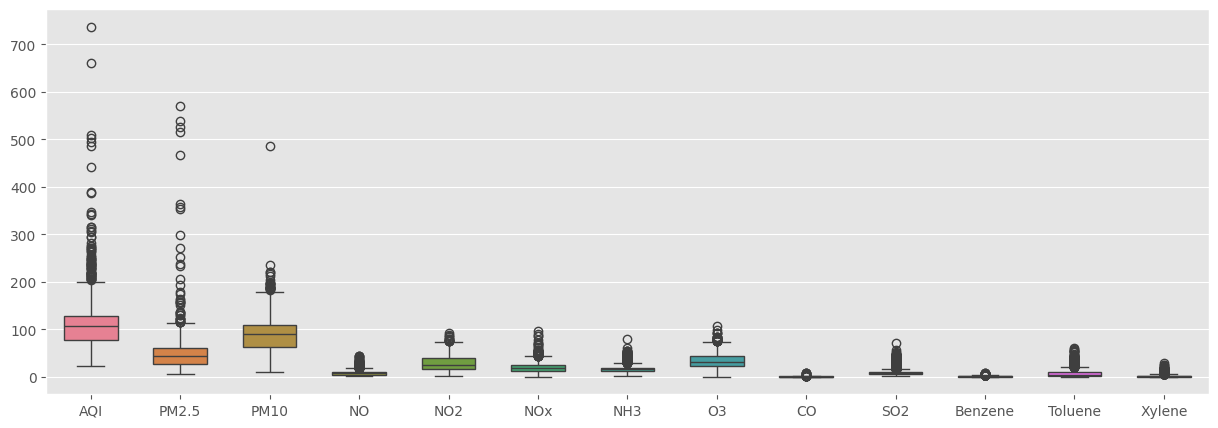

In [ ]:
plt.figure(figsize=(15, 5))
sns.boxplot(data=City_df2[[ 'AQI','PM2.5', 'PM10','NO', 'NO2', 'NOx','NH3','O3', 'CO', 'SO2','Benzene', 'Toluene', 'Xylene']],width=0.6)
plt.show()

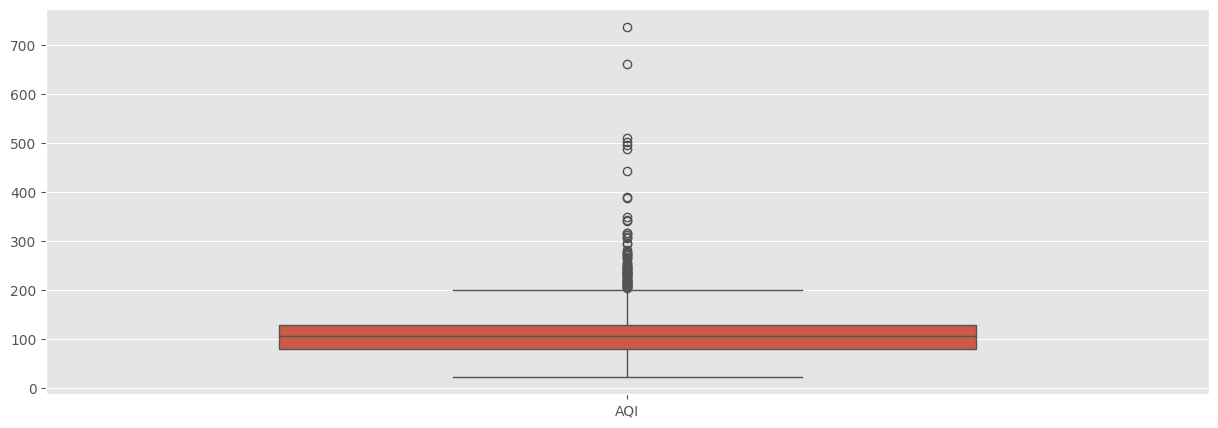

In [ ]:
plt.figure(figsize=(15, 5))
sns.boxplot(data=City_df2[[ 'AQI']],width=0.6)
plt.show()

In [ ]:
def replace_outliers_with_quartiles(df_city_day):
    for column in df_city_day.select_dtypes(include=['number']).columns:
        Q1 = df_city_day[column].quantile(0.25)
        Q3 = df_city_day[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df_city_day[column] = df_city_day[column].apply(
            lambda x: Q1 if x < lower_bound else (Q3 if x > upper_bound else x)
        )
    return df_city_day
City_df2 = replace_outliers_with_quartiles(City_df2)
City_df2

<ipython-input-266-2ff9e05d1216>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_city_day[column] = df_city_day[column].apply(
<ipython-input-266-2ff9e05d1216>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_city_day[column] = df_city_day[column].apply(
<ipython-input-266-2ff9e05d1216>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/p

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
14581,Hyderabad,2015-01-04,46.658154,89.755751,3.70,17.19,20.89,16.427504,0.30,2.58,30.34,0.41,6.15,1.11,109.047396,Moderate
14582,Hyderabad,2015-01-05,46.658154,89.755751,3.61,9.69,13.30,16.427504,0.23,5.19,31.28,0.39,7.22,0.55,109.047396,Moderate
14583,Hyderabad,2015-01-06,46.658154,89.755751,4.21,22.02,26.23,16.427504,0.31,9.09,28.56,0.52,5.14,0.53,109.047396,Moderate
14584,Hyderabad,2015-01-07,46.658154,89.755751,9.82,40.08,24.82,16.427504,0.53,9.03,31.08,1.92,16.35,2.14,109.047396,Moderate
14585,Hyderabad,2015-01-08,46.658154,89.755751,10.31,33.02,24.82,16.427504,0.44,8.47,35.72,1.89,14.27,1.58,109.047396,Moderate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16582,Hyderabad,2020-06-27,23.290000,44.200000,6.38,22.64,15.39,9.340000,0.36,5.39,24.22,0.88,6.72,0.95,58.000000,Satisfactory
16583,Hyderabad,2020-06-28,15.800000,32.180000,5.79,22.73,14.89,11.090000,0.36,6.36,22.25,0.82,6.48,1.11,49.000000,Good
16584,Hyderabad,2020-06-29,20.240000,44.740000,3.96,27.59,17.09,13.090000,0.38,6.29,19.98,1.31,10.83,2.71,47.000000,Good
16585,Hyderabad,2020-06-30,19.380000,41.950000,2.63,24.58,14.59,10.800000,0.39,5.30,17.40,1.45,13.07,2.51,46.000000,Good


Let's see the new data after outliers in the boxplot

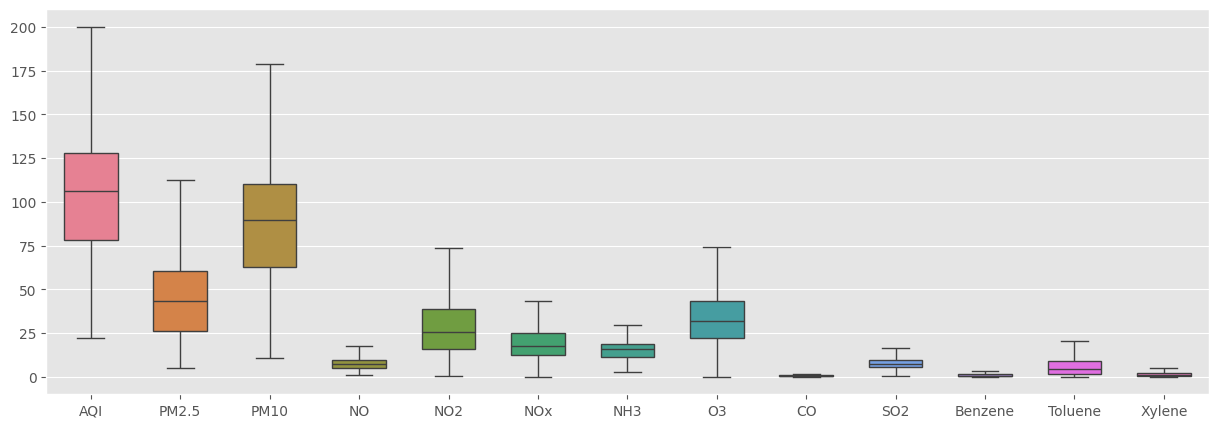

In [ ]:
plt.figure(figsize=(15, 5))
sns.boxplot(data=City_df2[[ 'AQI','PM2.5', 'PM10','NO', 'NO2', 'NOx','NH3','O3', 'CO', 'SO2','Benzene', 'Toluene', 'Xylene']],width=0.6)
plt.show()

In [ ]:
# One-hot encode the 'City' column
City_df2 = pd.get_dummies(City_df2, columns=['City'], prefix='City')

Label Encoding

In [ ]:

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

# Fit and transform the 'AQI_Bucket' column
City_df2['AQI_Bucket'] = le.fit_transform(City_df2['AQI_Bucket'])

print(f"Unique values: {le.classes_}")
print(f"Corresponding numerical labels: {le.transform(le.classes_)}")

Unique values: ['Good' 'Moderate' 'Poor' 'Satisfactory' 'Severe' 'Very Poor']
Corresponding numerical labels: [0 1 2 3 4 5]


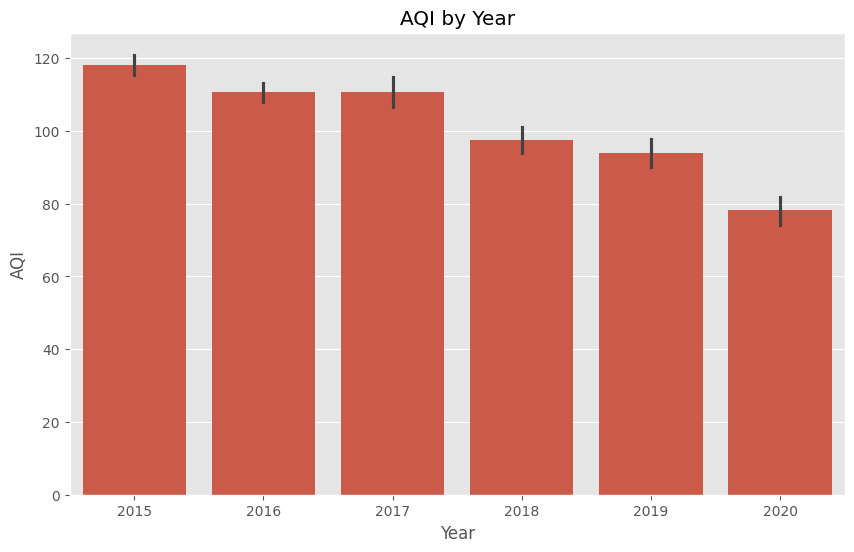

In [ ]:

if 'Year' not in City_df2.columns:  # Check if 'Year' column exists
    if 'Date' in City_df2.columns:
        City_df2['Year'] = pd.to_datetime(City_df2['Date']).dt.year
    else:

        print("Error: No 'Year' or 'Date' column found in the DataFrame. Please add the year information.")

plt.figure(figsize=(10, 6))
sns.barplot(x='Year', y='AQI', data=City_df2)

# Title and labels
plt.title('AQI by Year')
plt.xlabel('Year')
plt.ylabel('AQI')

# Display the plot
plt.show()

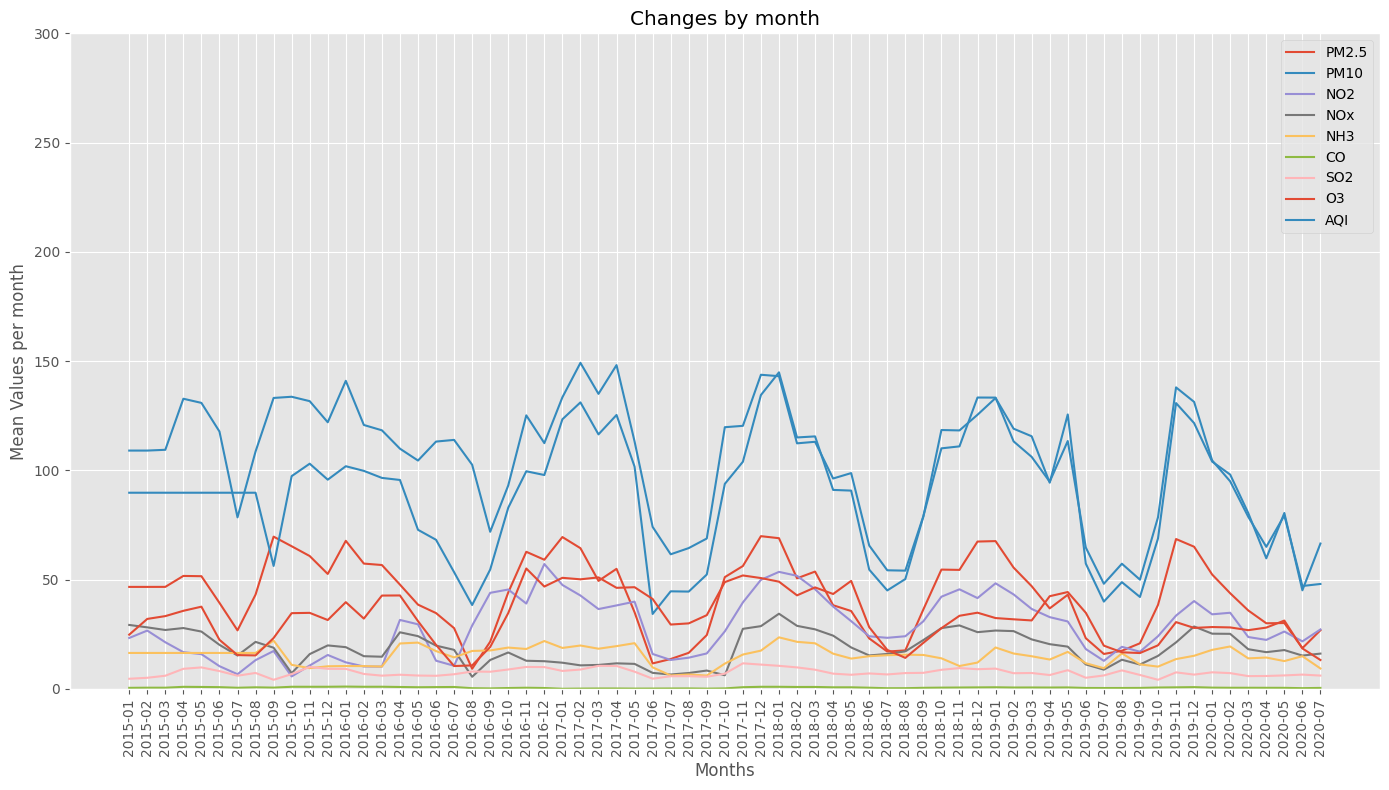

In [ ]:

plt.figure(figsize=(14, 8))

# Check if the column exists before plotting
for col in numerical_cols:
    if col in monthly_data.columns:  # Check if col is in monthly_data
        plt.plot(monthly_data.index.astype(str), monthly_data[col], label=col)
    else:
        print(f"Warning: Column '{col}' not found in monthly_data. Skipping...")

plt.xlabel('Months')
plt.ylabel('Mean Values per month')
plt.title('Changes by month')
plt.legend()
plt.grid(True)
plt.xticks(rotation=90)
plt.ylim(0,300) # set the y-axis limit
plt.tight_layout()
plt.show()

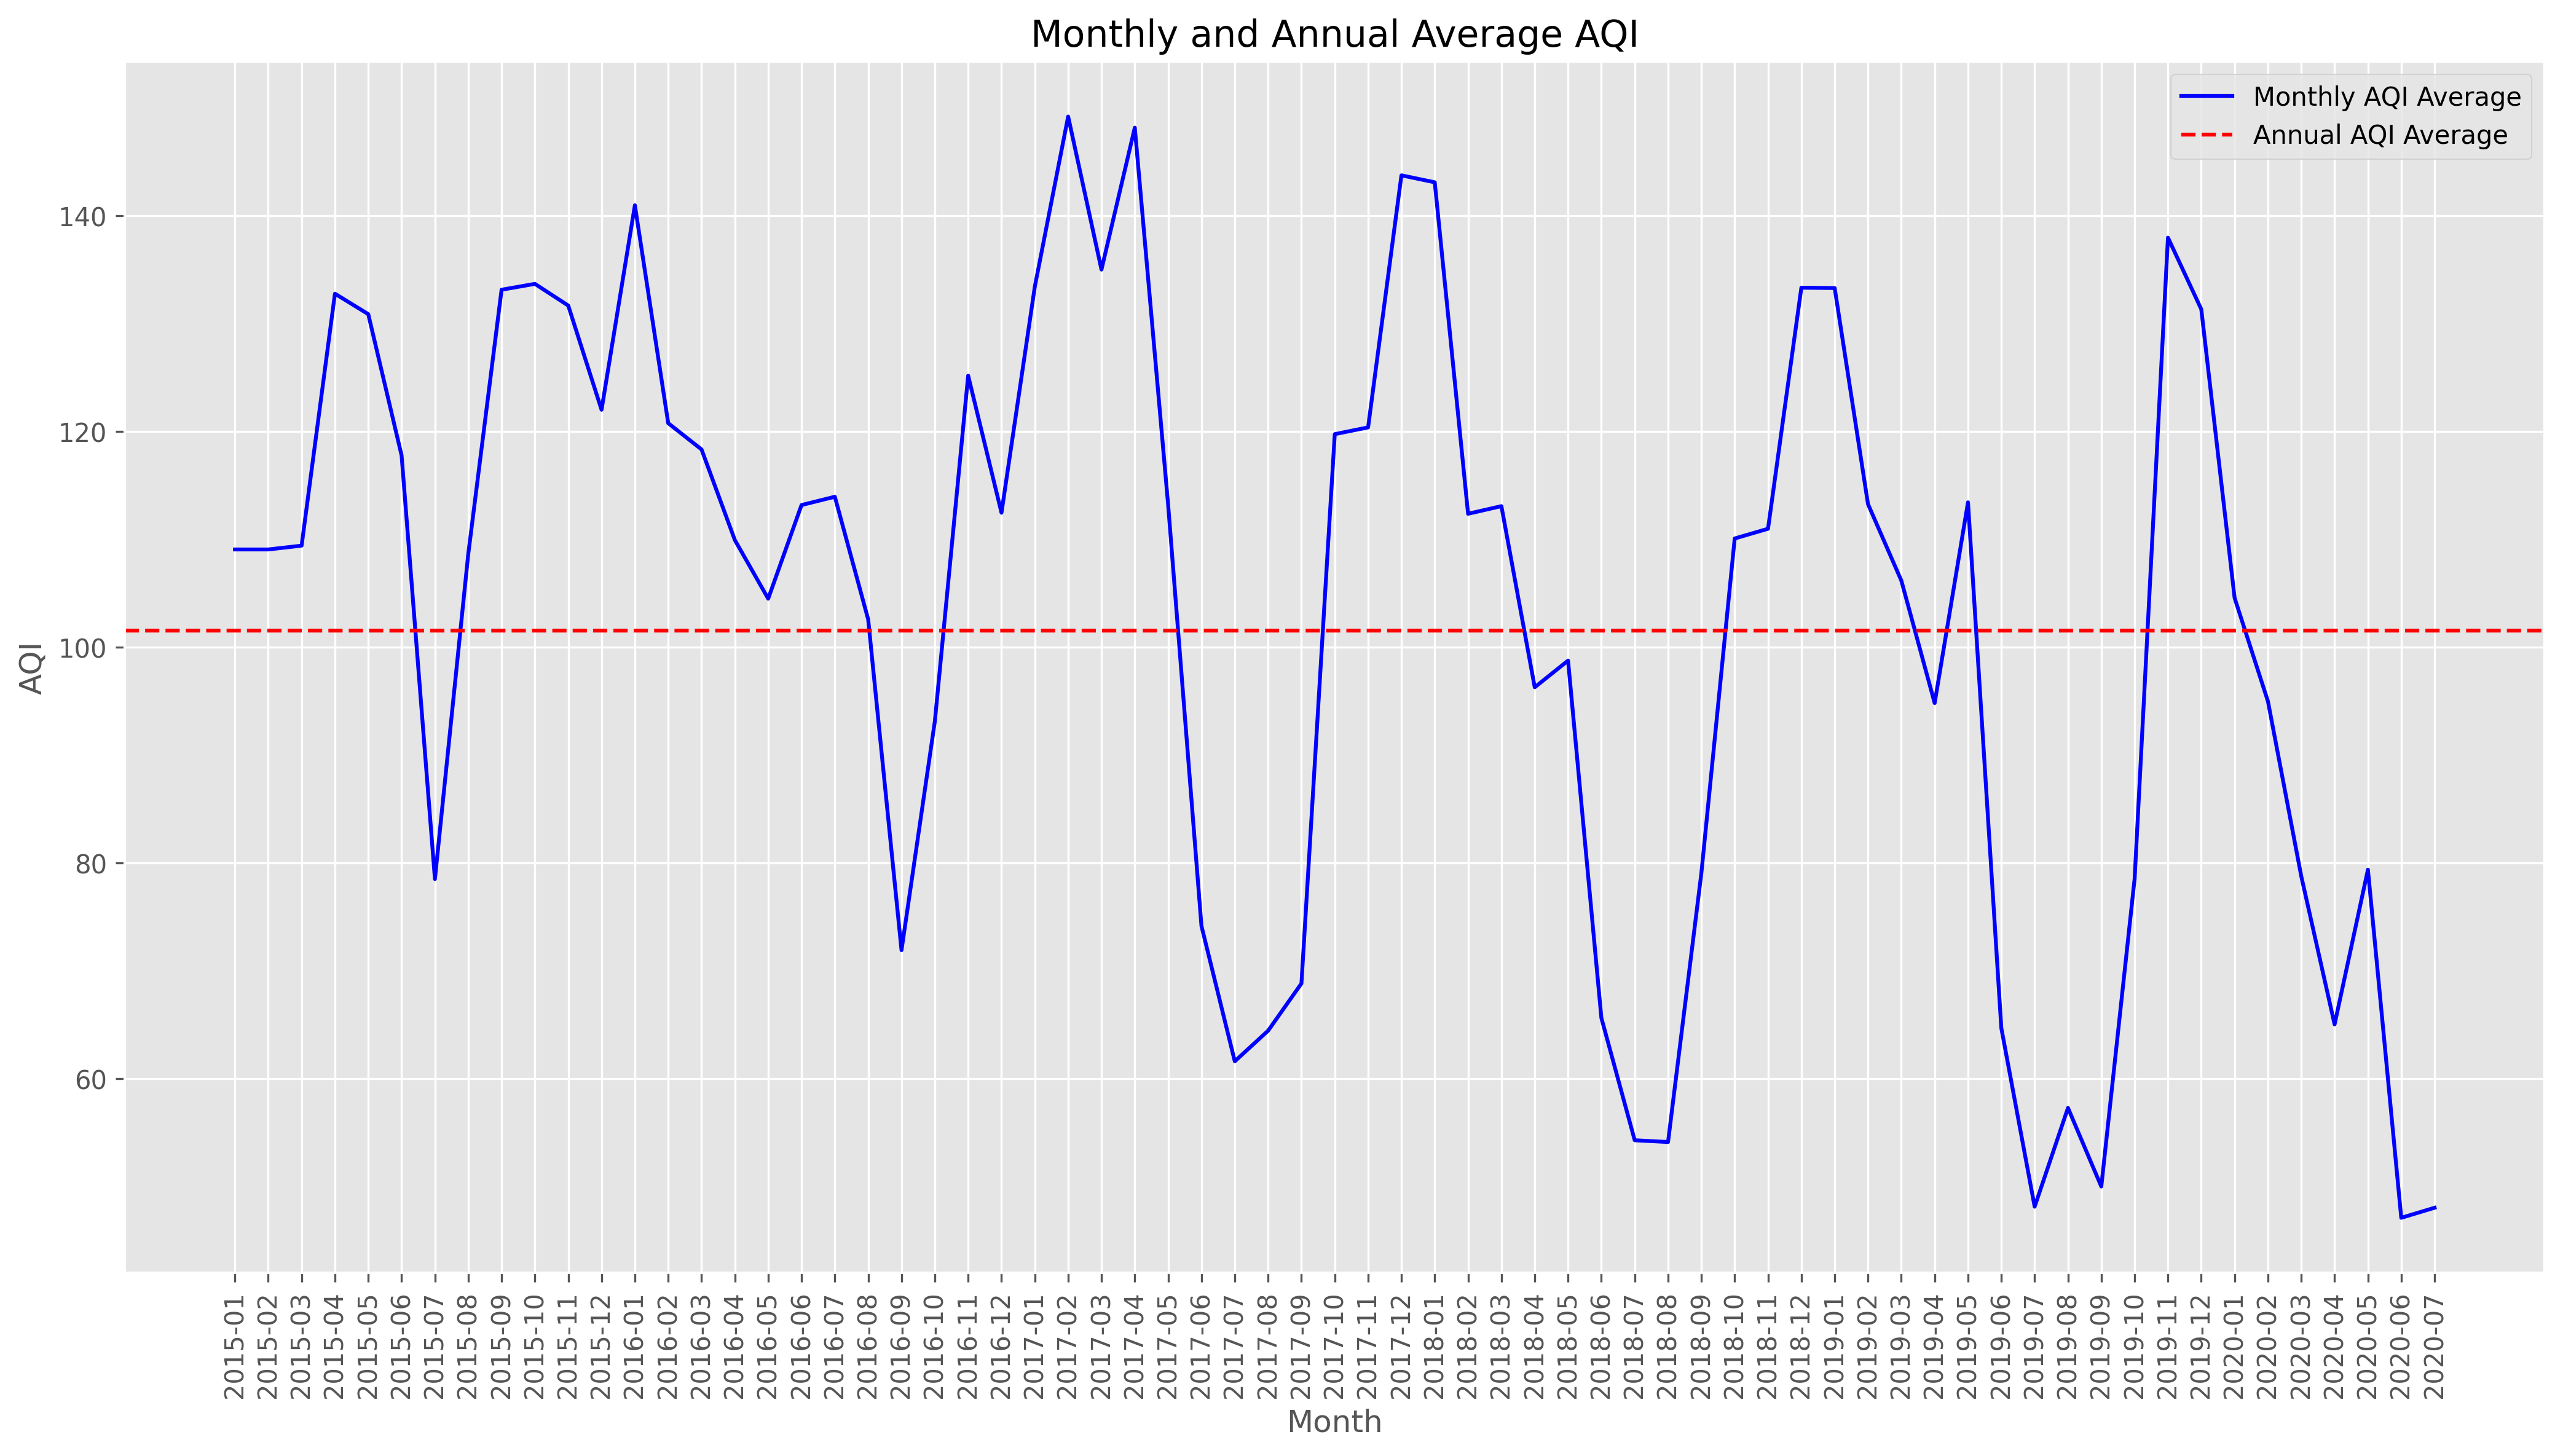

In [ ]:

City_df2['Month'] = City_df2['Date'].dt.to_period('M')
City_df2['Year'] = City_df2['Date'].dt.year

monthly_aqi = City_df2.groupby('Month')['AQI'].mean()

annual_aqi_mean = City_df2.groupby('Year')['AQI'].mean()

plt.figure(figsize=(14, 8), dpi=300)

plt.plot(monthly_aqi.index.astype(str), monthly_aqi, color='blue', label='Monthly AQI Average')

plt.axhline(y=annual_aqi_mean.mean(), linestyle='--', color='red', label='Annual AQI Average')

plt.xlabel('Month')
plt.ylabel('AQI')
plt.title('Monthly and Annual Average AQI')
plt.legend()
plt.grid(True)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


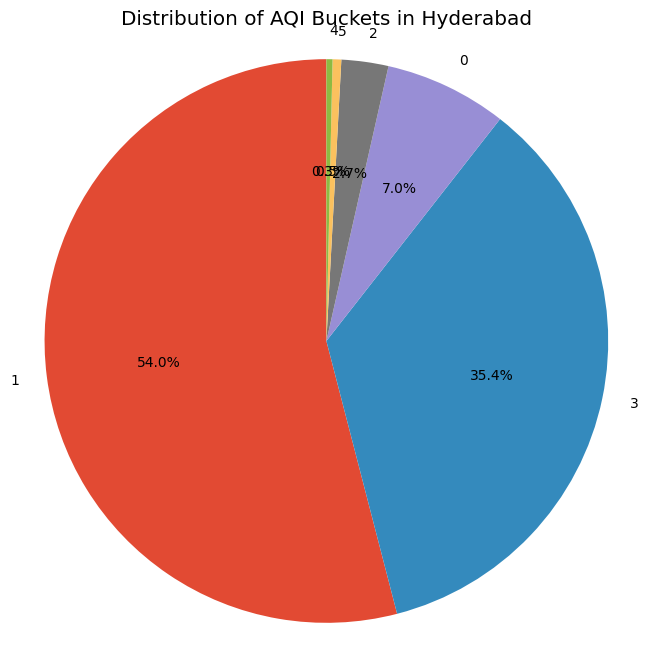

In [ ]:

aqi_bucket_counts = City_df2['AQI_Bucket'].value_counts()

# Create the pie chart
plt.figure(figsize=(8, 8))
plt.pie(aqi_bucket_counts, labels=aqi_bucket_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of AQI Buckets in Hyderabad')
plt.axis('equal')
plt.show()

**Split the dataset for ML**

In [ ]:
X = City_df2.drop('AQI', axis=1)
y = City_df2['AQI']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (1604, 16)
y_train shape: (1604,)
X_test shape: (402, 16)
y_test shape: (402,)


In [ ]:
X_train.head()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI_Bucket,City_Hyderabad,Year,Month
15497,18.19,55.270000,7.48,15.37,7.12,5.000000,0.15,6.05,34.11,0.18,1.26,1.05,3,True,2017,2017-07
14842,88.00,52.015000,3.11,14.96,17.98,23.323571,0.48,1.79,18.37,0.53,3.28,0.02,1,True,2015,2015-09
15188,6.31,28.630000,10.71,44.71,13.01,18.757569,0.39,7.71,13.53,0.06,0.85,0.11,3,True,2016,2016-09
15911,14.61,45.180000,5.98,24.79,17.43,18.280000,0.27,7.85,11.18,0.53,3.42,1.40,0,True,2018,2018-08
14821,53.65,89.755751,6.41,11.61,17.64,16.427504,0.71,6.50,16.57,0.76,3.80,0.01,1,True,2015,2015-09


In [ ]:
X_test.head()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI_Bucket,City_Hyderabad,Year,Month
16386,40.80,83.560000,8.88,35.37,24.88,14.500000,0.67,5.14,26.37,1.120,5.690,0.900,3,True,2019,2019-12
15107,63.07,69.426667,7.79,10.21,18.00,17.517083,0.65,8.16,16.00,0.160,1.070,0.080,1,True,2016,2016-06
14974,67.17,104.620000,5.32,2.76,5.31,10.500000,1.43,11.66,0.10,0.532,4.218,0.218,1,True,2016,2016-02
15982,32.80,68.870000,5.38,36.41,23.46,8.990000,0.53,4.62,27.53,1.860,10.960,1.310,3,True,2018,2018-11
15014,63.41,109.620000,6.11,13.84,18.54,10.330000,0.96,6.19,38.78,1.190,5.730,1.420,1,True,2016,2016-03


In [ ]:
City_df2['Month'] = City_df2['Month'].astype(str).astype(float)
City_df2['Year'] = City_df2['Year'].astype(str).astype(float)


,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket,City_Hyderabad,Year,Month
14581,46.658154,89.755751,3.70,17.19,20.89,16.427504,0.30,2.58,30.34,0.41,6.15,1.11,109.047396,1,True,NaN,540.0
14582,46.658154,89.755751,3.61,9.69,13.30,16.427504,0.23,5.19,31.28,0.39,7.22,0.55,109.047396,1,True,NaN,540.0
14583,46.658154,89.755751,4.21,22.02,26.23,16.427504,0.31,9.09,28.56,0.52,5.14,0.53,109.047396,1,True,NaN,540.0
14584,46.658154,89.755751,9.82,40.08,24.82,16.427504,0.53,9.03,31.08,1.92,16.35,2.14,109.047396,1,True,NaN,540.0
14585,46.658154,89.755751,10.31,33.02,24.82,16.427504,0.44,8.47,35.72,1.89,14.27,1.58,109.047396,1,True,NaN,540.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16582,23.290000,44.200000,6.38,22.64,15.39,9.340000,0.36,5.39,24.22,0.88,6.72,0.95,58.000000,3,True,NaN,605.0
16583,15.800000,32.180000,5.79,22.73,14.89,11.090000,0.36,6.36,22.25,0.82,6.48,1.11,49.000000,0,True,NaN,605.0
16584,20.240000,44.740000,3.96,27.59,17.09,13.090000,0.38,6.29,19.98,1.31,10.83,2.71,47.000000,0,True,NaN,605.0
16585,19.380000,41.950000,2.63,24.58,14.59,10.800000,0.39,5.30,17.40,1.45,13.07,2.51,46.000000,0,True,NaN,605.0


In [ ]:
from sklearn.linear_model import Ridge, SGDRegressor, ElasticNet, Lasso
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score


In [ ]:
#created a dict objects from different models
models = {
    'LinearRegression': LinearRegression(),
    'Ridge': Ridge(),
    'SGDRegressor' : SGDRegressor(),
    'ElasticNet':ElasticNet(),
    'Lasso' : Lasso(),
    'SVR' :SVR(kernel='linear'),
    'GradientBoostingRegressor': GradientBoostingRegressor(random_state=42)
}

In [ ]:
# prompt: cast PeriodArray to dtype float64

# Assuming 'City_df2['Month']' is your PeriodArray column
City_df2['Month'] = City_df2['Month'].astype('int64')
City_df2['Year'] = City_df2['Year'].astype

In [ ]:
from sklearn.linear_model import LinearRegression, Ridge, SGDRegressor, ElasticNet, Lasso
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

for col in ['Month', 'Year']:
    if col in X_train.columns:
        if pd.api.types.is_period_dtype(X_train[col]):
            X_train[col] = X_train[col].astype('int64')
        if pd.api.types.is_period_dtype(X_test[col]):
            X_test[col] = X_test[col].astype('int64')

models = {
    'LinearRegression': LinearRegression(),
    'Ridge': Ridge(),
    'SGDRegressor' : SGDRegressor(),
    'ElasticNet':ElasticNet(),
    'Lasso' : Lasso(),
    'SVR' :SVR(kernel='linear'),
    'GradientBoostingRegressor': GradientBoostingRegressor(random_state=42)
}

# Iterate through models and train/evaluate
for name, model in models.items():
    # Fit the model
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Evaluate the model
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f"Model: {name}")
    print(f"Mean Squared Error: {mse}")
    print(f"R-squared: {r2}")
    print("-" * 20)

Model: LinearRegression
Mean Squared Error: 316.9064934169551
R-squared: 0.7464312143956169
--------------------
Model: Ridge
Mean Squared Error: 316.7403611446391
R-squared: 0.7465641430651643
--------------------
Model: SGDRegressor
Mean Squared Error: 1.1968044374780768e+30
R-squared: -9.576081718779214e+26
--------------------
Model: ElasticNet
Mean Squared Error: 320.20521830215966
R-squared: 0.7437917807438621
--------------------
Model: Lasso
Mean Squared Error: 322.2043291691442
R-squared: 0.7421922170701609
--------------------
Model: SVR
Mean Squared Error: 324.65419980817353
R-squared: 0.740231983576273
--------------------
Model: GradientBoostingRegressor
Mean Squared Error: 168.12689672464634
R-squared: 0.8654753565626332
--------------------


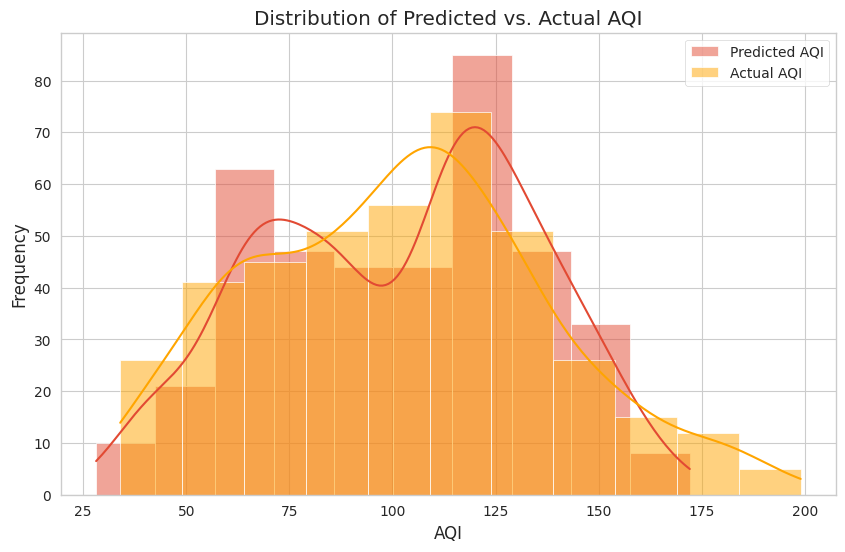

In [ ]:

plt.figure(figsize=(10, 6))
sns.histplot(y_pred, kde=True, label='Predicted AQI')
sns.histplot(y_test, kde=True, label='Actual AQI', color='orange')
plt.title('Distribution of Predicted vs. Actual AQI')
plt.xlabel('AQI')
plt.ylabel('Frequency')
plt.legend()
plt.show()

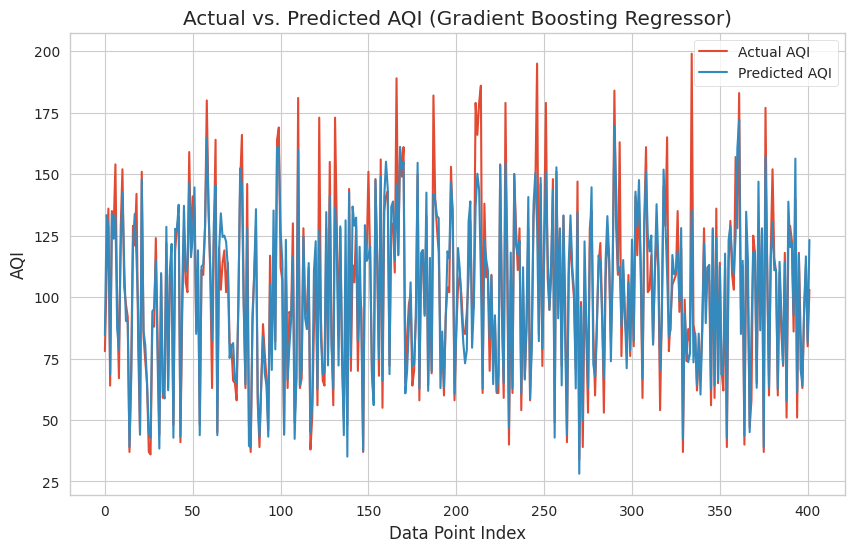

In [ ]:

gb_model = models['GradientBoostingRegressor']
y_pred_gb = gb_model.predict(X_test)

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='Actual AQI')  # Use .values to get the underlying NumPy array
plt.plot(y_pred_gb, label='Predicted AQI')
plt.xlabel('Data Point Index')
plt.ylabel('AQI')
plt.title('Actual vs. Predicted AQI (Gradient Boosting Regressor)')
plt.legend()
plt.grid(True)
plt.show()

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       185
           1       0.99      0.99      0.99       217

    accuracy                           0.99       402
   macro avg       0.98      0.98      0.98       402
weighted avg       0.99      0.99      0.99       402



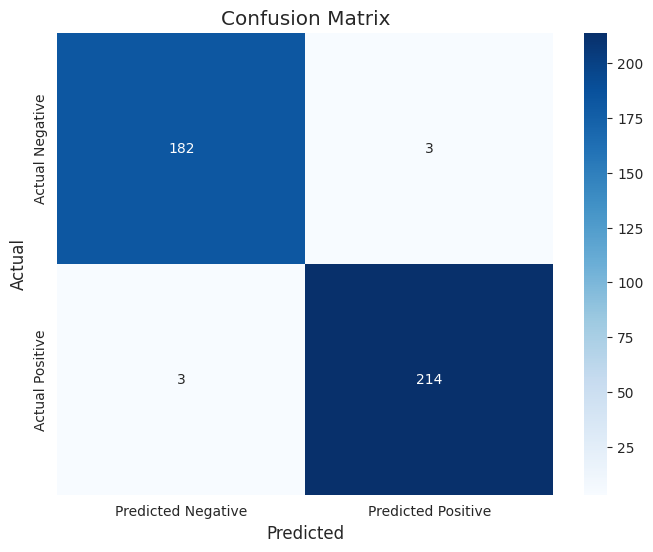

In [ ]:
import numpy as np # Needed for np.where
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming y_pred and y_test are already defined and are for a classification task
# Convert regression predictions to classes
threshold = 100 # Example threshold, adjust as needed for your data
y_pred_class = np.where(y_pred >= threshold, 1, 0) # Classify predictions
y_test_class = np.where(y_test >= threshold, 1, 0) # Classify actual values

# Calculate confusion matrix
cm = confusion_matrix(y_test_class, y_pred_class) # Use classification labels

# Calculate classification metrics (precision, recall, F1-score, accuracy)
classification_rep = classification_report(y_test_class, y_pred_class)
print(classification_rep)

# Create confusion matrix plot
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive']) # Adjust labels as needed
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()